In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from data import RANZCRDataset
from swav.src.multicropdataset import MultiCropDataset
import joblib
import os
from tqdm import tqdm
from multiprocessing import Pool
import cv2

In [2]:
train = pd.read_csv('../../input/kaggle/train.csv')
train_annotations = pd.read_csv('../../input/kaggle/train_annotations.csv', index_col='StudyInstanceUID')
sample_submission = pd.read_csv('../../input/kaggle/sample_submission.csv')
uids = train['StudyInstanceUID'].values
folds = joblib.load('folds.jl')
label_cols = [
    'ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
    'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
    'Swan Ganz Catheter Present'
]
img_path = '../../input/kaggle/train'
train_annotations['data'] = train_annotations['data'].apply(eval)

In [9]:
class cfg:
    data_dir = '../../input/processed/data'
    resolution = 1024
    centercrop = 1.
    aug = 0
    fold = 0
    downconv = 0
    seg_pretrain = 1
    black_white = 0
    clahe_tile_grid_size =16
    clahe_clip_offset = 0
    normalize = 1
mode = 'train'
folds = joblib.load('folds.jl')
train_uids, valid_uids = folds[cfg.fold][0], folds[cfg.fold][1]
train_paths = [os.path.join(cfg.data_dir, uid)+'.jl' for uid in train_uids]
dataset = RANZCRDataset(train_paths, cfg, mode)
dataloader = DataLoader(dataset, batch_size=8, num_workers=2, shuffle=False)

0


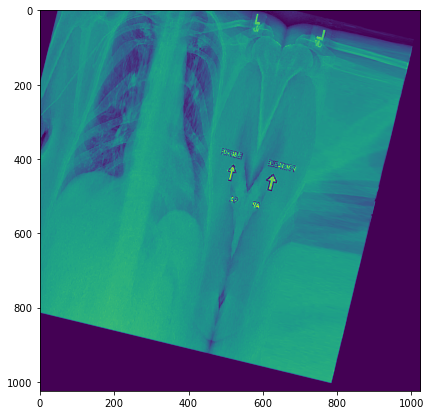

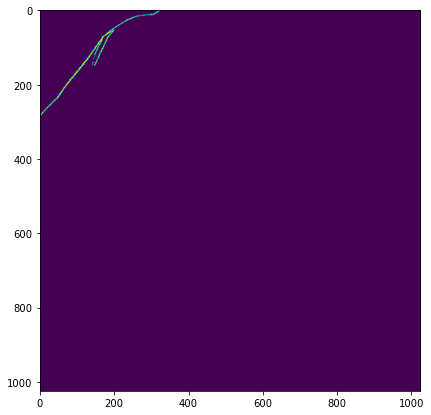

1


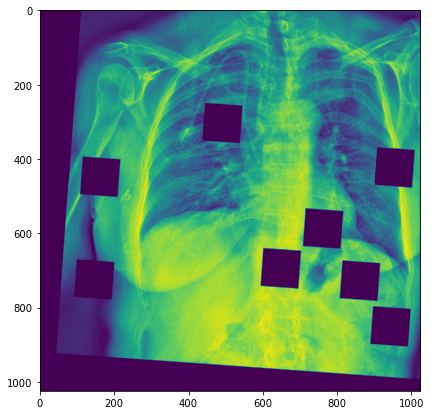

2


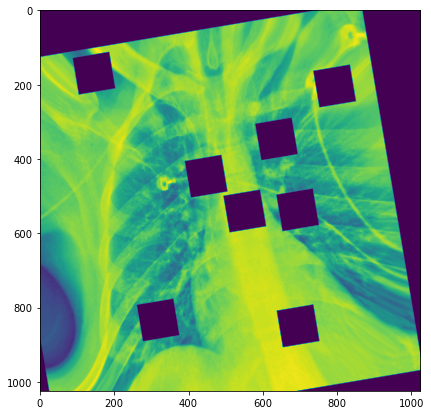

3


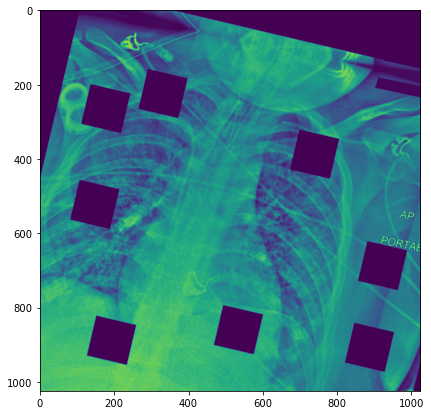

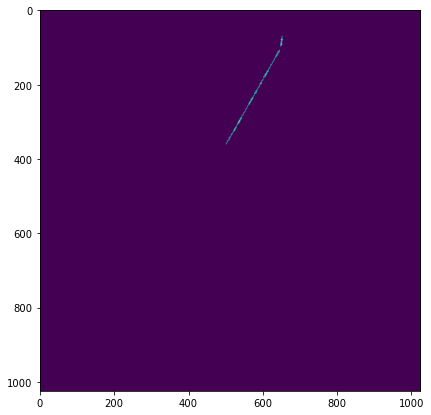

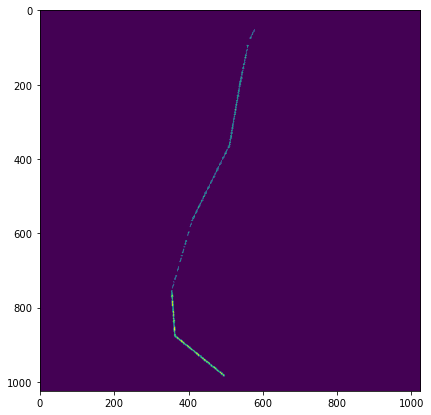

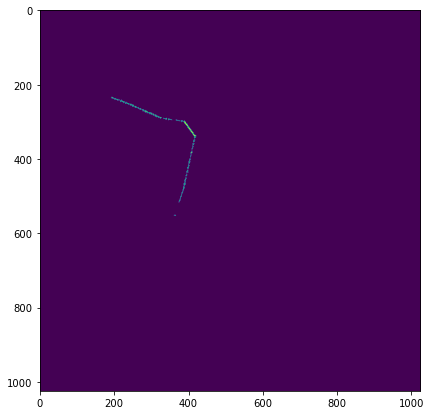

4


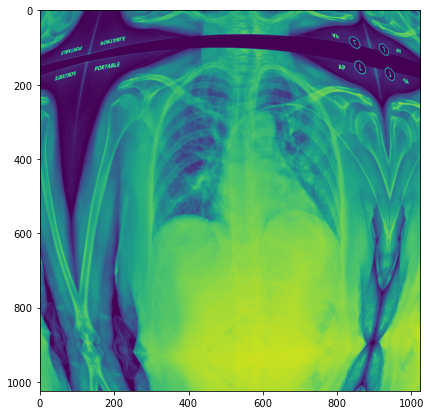

5


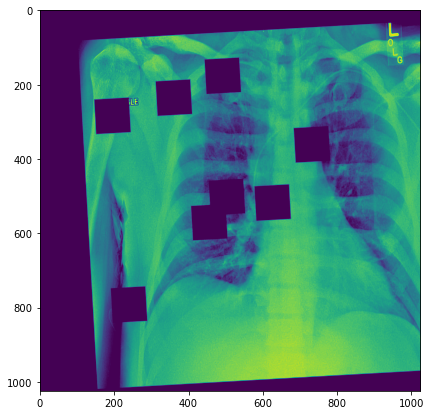

6


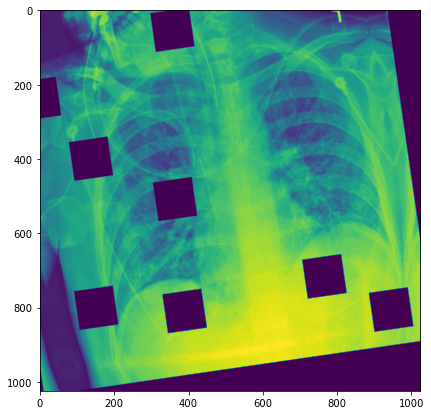

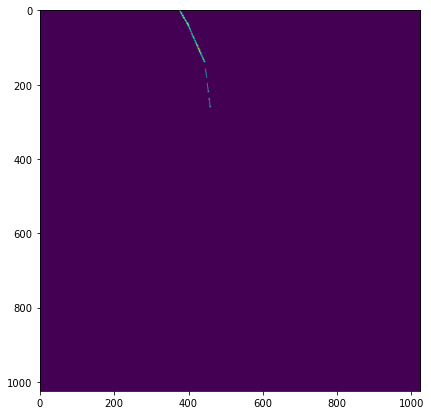

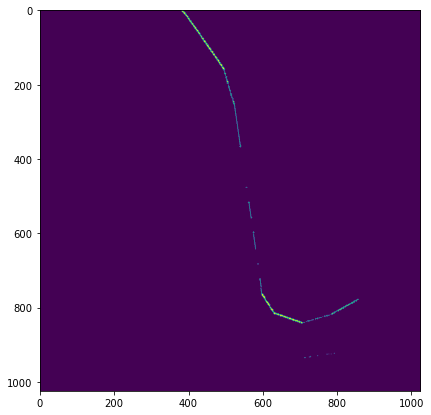

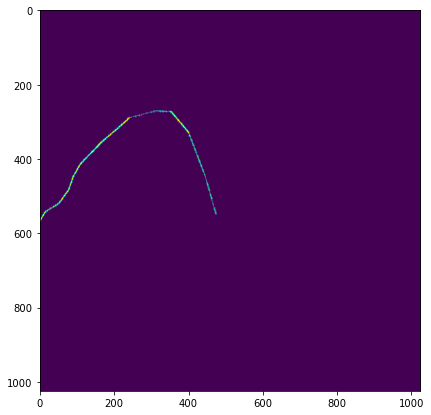

7


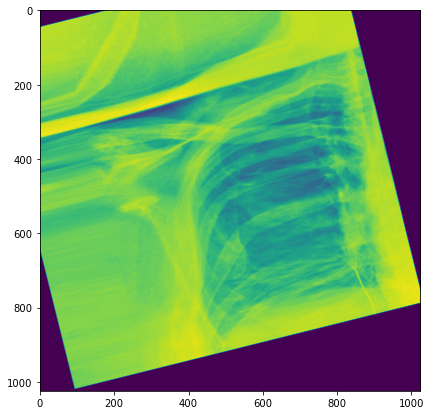

8


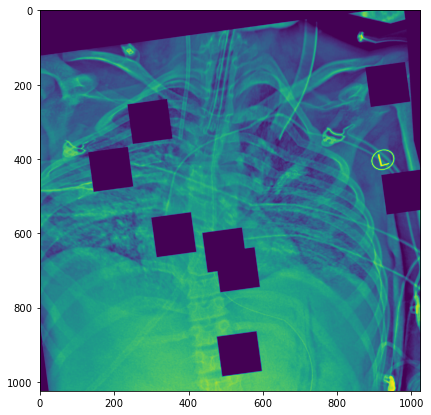

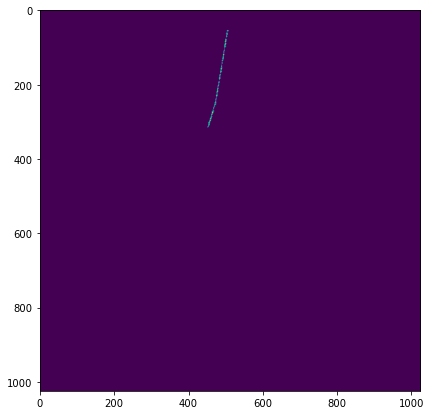

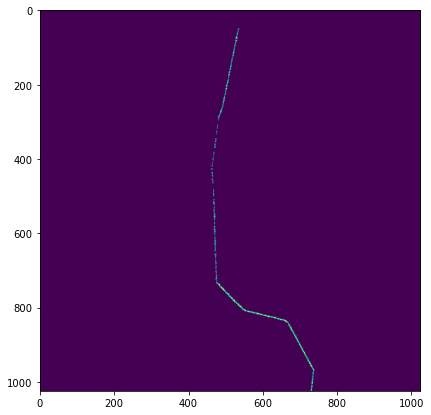

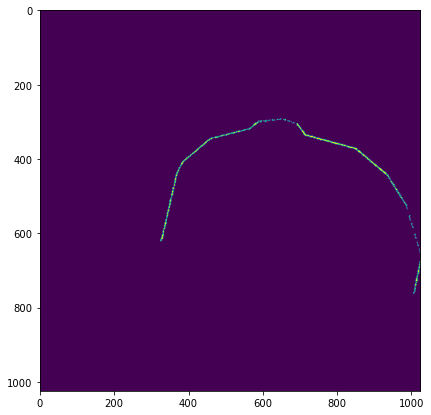

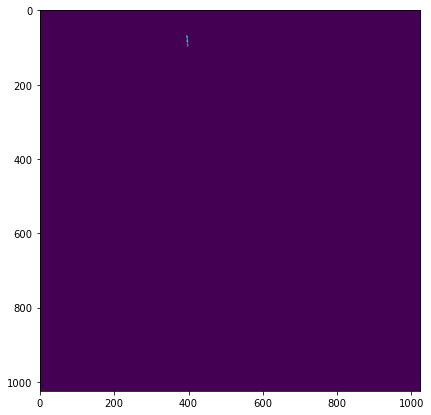

9


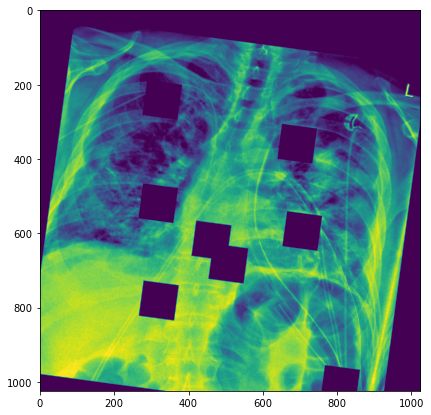

In [18]:
for i in range(10):
    print(i)
    cur = dataset[i]
    plt.figure(figsize=(7, 7))
    plt.imshow(cur['img'][0])
    plt.show()
    if mode != 'test':
        if cur['annotated']==1:
            mask_exist_index = np.where(cur['masks'].numpy().sum(axis=(1,2)) > 0)[0]
            for idx in mask_exist_index:
                plt.figure(figsize=(7, 7))
                plt.imshow(cur['masks'][idx])
                plt.show()
